In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
from bokeh.io import show, output_notebook
from bokeh.palettes import Spectral9
from bokeh.plotting import figure
output_notebook() # You can use output_file();

import plotly.graph_objects as go
import plotly.express as px

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.offline as py
py.init_notebook_mode(connected = True)

# Special
import wordcloud, missingno
from wordcloud import WordCloud # wordcloud
import missingno as msno # check missing value
import networkx as nx
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Loading BokehJS ...

/kaggle/input/steam-store-games/steam_support_info.csv
/kaggle/input/steam-store-games/steam_media_data.csv
/kaggle/input/steam-store-games/steamspy_tag_data.csv
/kaggle/input/steam-store-games/steam_requirements_data.csv
/kaggle/input/steam-store-games/steam_description_data.csv
/kaggle/input/steam-store-games/steam.csv
/kaggle/input/videogames-sales-dataset/XboxOne_GameSales.csv
/kaggle/input/videogames-sales-dataset/PS4_GamesSales.csv
/kaggle/input/videogames-sales-dataset/Video_Games_Sales_as_at_22_Dec_2016.csv
/kaggle/input/17k-apple-app-store-strategy-games/appstore_games.csv


In [2]:
video_games_sales = pd.read_csv('/kaggle/input/videogames-sales-dataset/Video_Games_Sales_as_at_22_Dec_2016.csv')
video_games_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
more_than_half_null_cols = ['Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating']
video_games_sales.drop(columns=more_than_half_null_cols,inplace=True)

<BarContainer object of 10 artists>

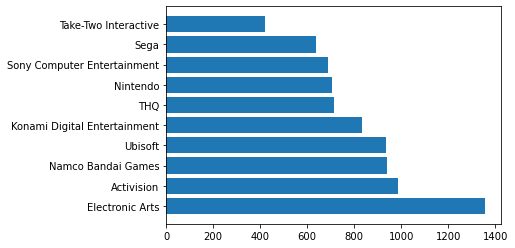

In [4]:
# Top 10 publishers
top_10_publishers = list(dict(video_games_sales['Publisher'].value_counts()))[:10]
top_10_publishers_values = list(video_games_sales['Publisher'].value_counts())[:10]
plt.barh(top_10_publishers,top_10_publishers_values)

<BarContainer object of 10 artists>

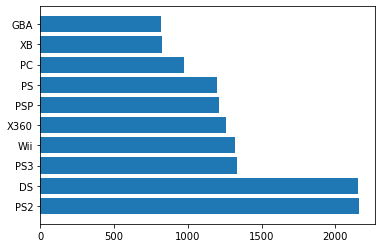

In [5]:
# Top 10 platforms
top_10_publishers = list(dict(video_games_sales['Platform'].value_counts()))[:10]
top_10_publishers_values = list(video_games_sales['Platform'].value_counts())[:10]
plt.barh(top_10_publishers,top_10_publishers_values)

<BarContainer object of 10 artists>

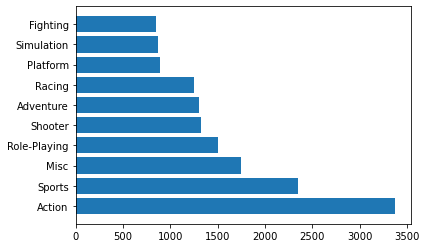

In [6]:
# Top 10 genere
top_10_publishers = list(dict(video_games_sales['Genre'].value_counts()))[:10]
top_10_publishers_values = list(video_games_sales['Genre'].value_counts())[:10]
plt.barh(top_10_publishers,top_10_publishers_values)

Text(0.5, 1.0, 'Most Games sold by Plaform in North America')

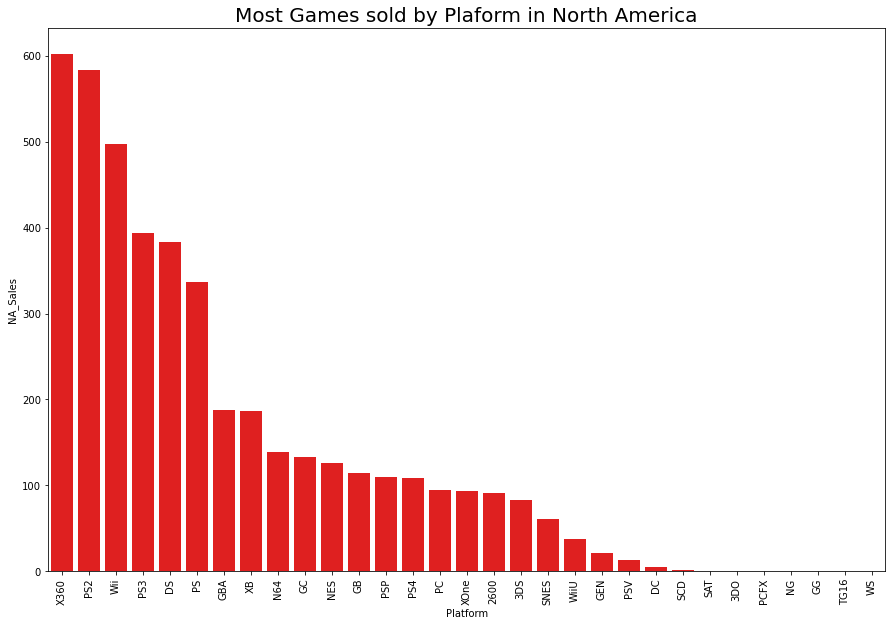

In [7]:
NA_sales = video_games_sales.groupby(by=['Platform'])['NA_Sales'].sum()
NA_sales = NA_sales.reset_index()
NA_sales = NA_sales.sort_values(by=['NA_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="NA_Sales", data=NA_sales, palette=['red'])
plt.xticks(rotation=90)
plt.title('Most Games sold by Plaform in North America', fontsize='20')

Text(0.5, 1.0, 'Most Games sold by Plaform in Europe')

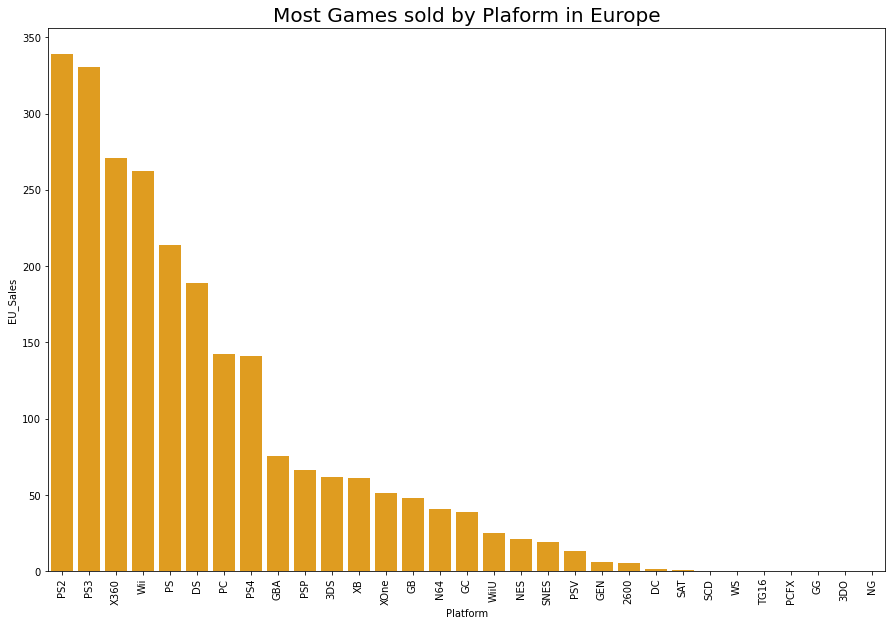

In [8]:
EU_Sales = video_games_sales.groupby(by=['Platform'])['EU_Sales'].sum()
EU_Sales = EU_Sales.reset_index()
EU_Sales = EU_Sales.sort_values(by=['EU_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="EU_Sales", data=EU_Sales, palette=['orange'])
plt.xticks(rotation=90)
plt.title('Most Games sold by Plaform in Europe', fontsize='20')

X360 is winner in North America and PS2 is the winner in Europe , DS in Japan

Text(0.5, 1.0, 'Most Games sold by Plaform in Japan')

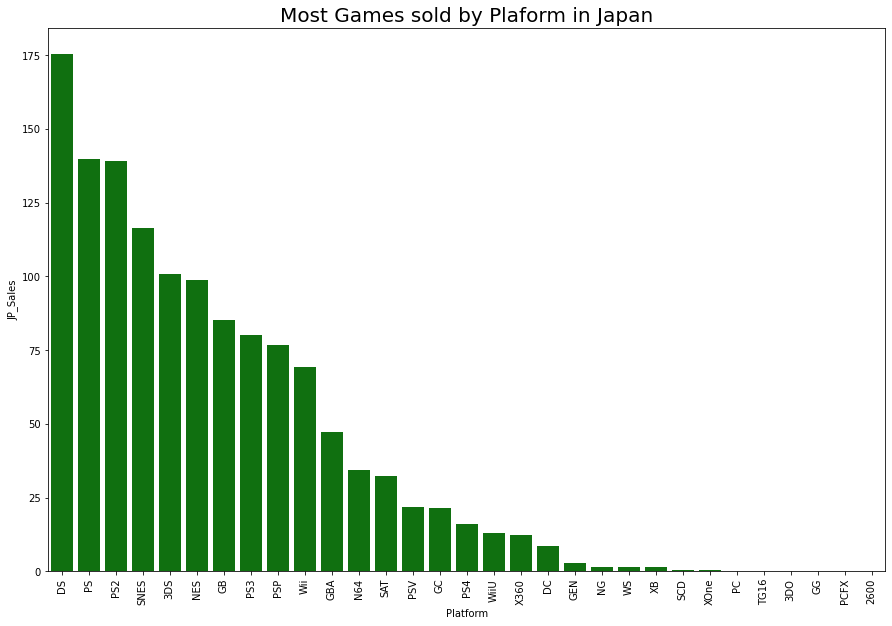

In [9]:
JP_Sales = video_games_sales.groupby(by=['Platform'])['JP_Sales'].sum()
JP_Sales = JP_Sales.reset_index()
JP_Sales = JP_Sales.sort_values(by=['JP_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="JP_Sales", data=JP_Sales, palette=['green'])
plt.xticks(rotation=90)
plt.title('Most Games sold by Plaform in Japan', fontsize='20')

In [10]:
apple_app_store = pd.read_csv('../input/17k-apple-app-store-strategy-games/appstore_games.csv')
apple_app_store = apple_app_store.drop(['URL','ID'],axis = 1)

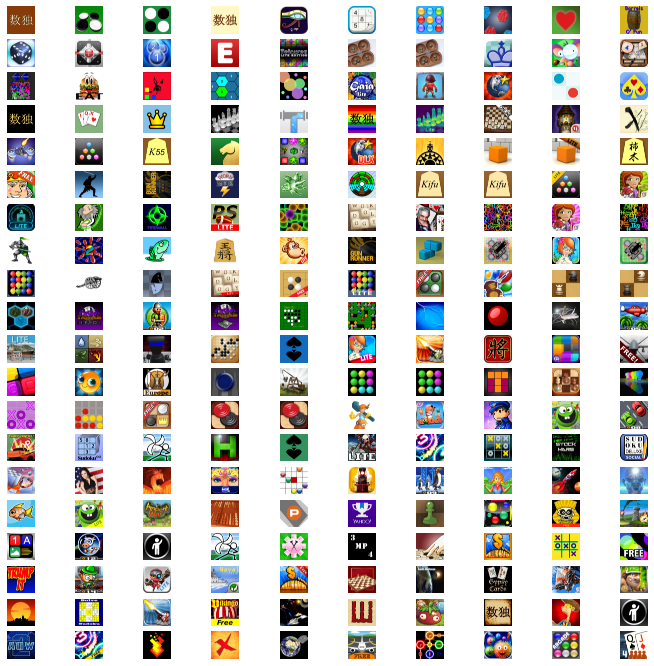

In [11]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

fig,ax = plt.subplots(20,10, figsize = (12,12))

for i in range(200):
    r = requests.get(apple_app_store['Icon URL'][i])
    image = Image.open(BytesIO(r.content))
    ax[i//10][i%10].imshow(image)
    ax[i//10][i%10].axis('off')
plt.show()

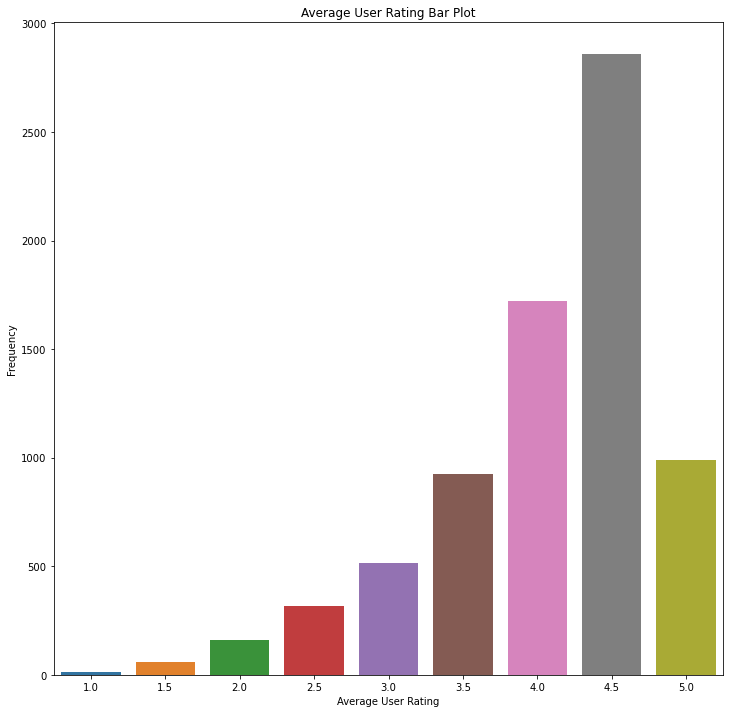

In [12]:
plt.figure(figsize = (12,12))
sns.barplot(x = apple_app_store['Average User Rating'].value_counts().index,
           y=apple_app_store['Average User Rating'].value_counts().values)
plt.xlabel('Average User Rating')
plt.ylabel('Frequency')
plt.title('Average User Rating Bar Plot')
plt.show()

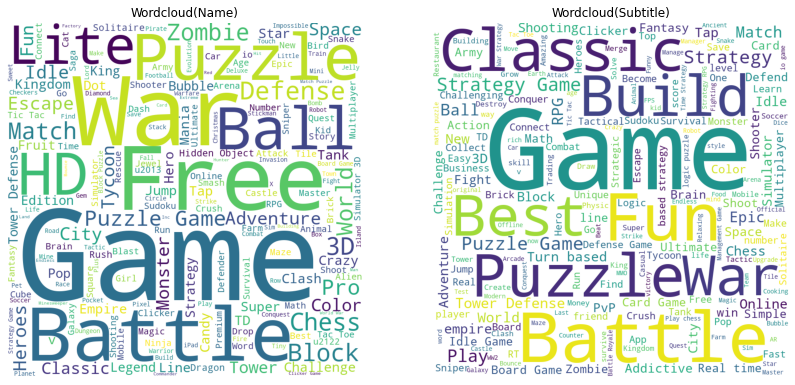

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14,28))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(apple_app_store['Name']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(apple_app_store['Subtitle'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Subtitle)')
plt.show()

In [14]:
steam = pd.read_csv('../input/steam-store-games/steam.csv')

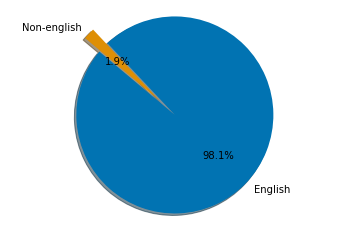

In [15]:
english_dict = dict(steam.english.value_counts())
labels = 'English', 'Non-english'
sizes = [english_dict[1], english_dict[0]]
colors = ['gold', 'lightskyblue']
explode = (0, 0.2)  # explode 1st slice

# Plot
with sns.color_palette("colorblind"):
    plt.pie(sizes, explode=explode, labels=labels, # colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

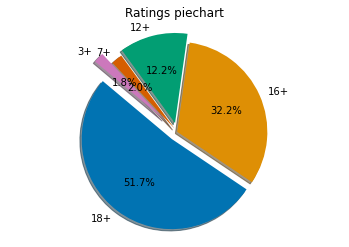

In [16]:
age_dict = dict(steam.required_age.value_counts())
labels = '18+', '16+', '12+', '7+', '3+'
sizes = [age_dict[18], age_dict[16], age_dict[12], age_dict[7], age_dict[3]]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0, 0.1, 0.05, 0.2)  # explode 1st slice

# Plot
with sns.color_palette("colorblind"):
    plt.pie(sizes, explode=explode, labels=labels,# colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Ratings piechart')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Total games')

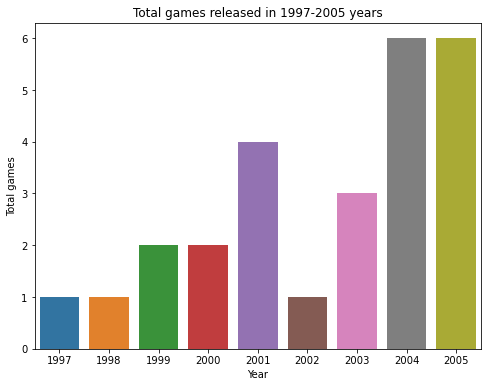

In [17]:
#release year
steam.release_date = pd.to_datetime(steam.release_date)
yearly = steam.groupby(steam.release_date.dt.year.rename('release_year'))\
    .agg('count').appid.rename('count')

sep_year = 2006

plt.figure(figsize=(8,6))

yearly_part = yearly[yearly.index < sep_year]
sns.barplot(y=yearly_part, x=yearly_part.index)
plt.title(f'Total games released in 1997-{sep_year-1} years')
plt.xlabel('Year')
plt.ylabel('Total games')

Text(0.5, 1.0, 'Percentage of genres')

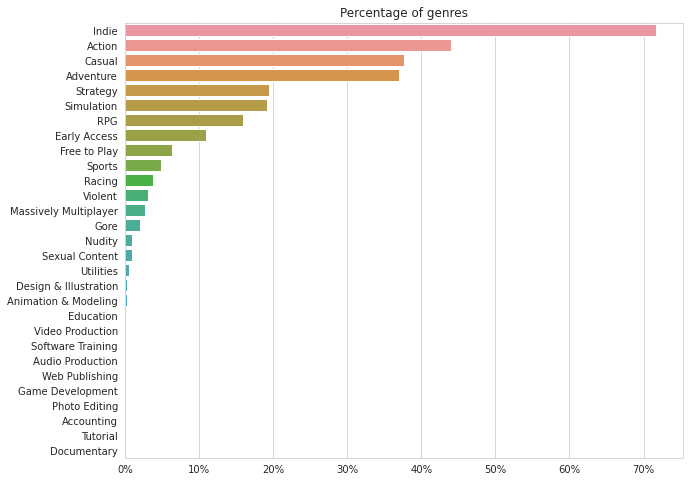

In [18]:
genres_set = set()
for i in steam.genres.str.split(';'):
    genres_set.update(i)
    
d = dict()
genre_sets = steam.genres.str.split(';').apply(set)
for genre in genres_set:
    d[genre] = genre_sets.apply(lambda row: genre in row)
steam = steam.assign(**d)

genres_count = steam[genres_set].sum()
genres_count = genres_count.sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
g = sns.barplot(y=genres_count.index, x=genres_count/len(steam))

vals = g.get_xticks()
g.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
g.set_title("Percentage of genres")